classification with tensroflow

In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
import numpy as np 

2023-11-25 20:58:43.736917: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 20:58:43.758150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 20:58:43.929969: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 20:58:43.931009: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 20:58:44.999840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:

X, y = make_circles(1000, noise = 0.03, random_state=42)
X.shape, y.shape, X[0:10, 0:10], y[0:10]  # looking at y it seems to be binary classification

((1000, 2),
 (1000,),
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:,1], "label" : y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


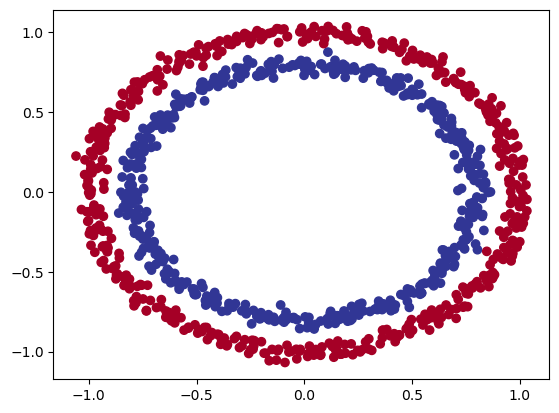

In [5]:
plt.scatter(X[:,0], X[:,1], c = y , cmap = 'RdYlBu')

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2, random_state= 43 , stratify=y)

In [24]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [25]:
import tensorflow as tf

In [26]:
Xt_tensor = tf.constant(X_train)
X_tensor = tf.constant(X_test)


In [42]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation='relu'), 
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), 
              metrics= ['accuracy'])
history = model.fit (Xt_tensor, y_train, epochs= 100, batch_size= 5)

Epoch 1/100
160/160 [==============================] - 1s 933us/step - loss: 0.7038 - accuracy: 0.4850
Epoch 2/100
160/160 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5750
Epoch 3/100
160/160 [==============================] - 0s 964us/step - loss: 0.6641 - accuracy: 0.6237
Epoch 4/100
160/160 [==============================] - 0s 917us/step - loss: 0.6452 - accuracy: 0.6562
Epoch 5/100
160/160 [==============================] - 0s 865us/step - loss: 0.6070 - accuracy: 0.7212
Epoch 6/100
160/160 [==============================] - 0s 888us/step - loss: 0.5642 - accuracy: 0.8112
Epoch 7/100
160/160 [==============================] - 0s 928us/step - loss: 0.5249 - accuracy: 0.8450
Epoch 8/100
160/160 [==============================] - 0s 928us/step - loss: 0.4614 - accuracy: 0.9150
Epoch 9/100
160/160 [==============================] - 0s 881us/step - loss: 0.4160 - accuracy: 0.9225
Epoch 10/100
160/160 [==============================] - 0s 1ms/step - loss:

In [43]:
model.evaluate(X_tensor, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000


[0.0070645916275680065, 1.0]

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score = r2_score(y_test, model.predict(X_tensor))
r2_score

7/7 [==============================] - 0s 2ms/step


0.9970234513888819

In [90]:
def plot_decision(modle , X, y):
    x_min ,x_max = X[:,0].min() - 0.1 , X[:, 1].max() + 0.1
    y_min ,y_max = X[:,1].min() - 0.1 , X[:, 0].max() + 0.1
    xx , yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max,100))
    x_in = np.c_[xx.ravel() , yy.ravel()]
    y_pred = model.predict(x_in)
    

    if len(y_pred[0])>1 : 
        print("multiclass ")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("bianry classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contour(xx,yy,y_pred, cmap = "RdYlBu", alpha = 0.7)
    plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = "RdYlBu")
    plt.xlim(xx.min() , xx.max())
    plt.ylim(yy.min(), yy.max())

 25/313 [=>............................] - ETA: 0s 

313/313 [==============================] - 1s 2ms/step
bianry classification


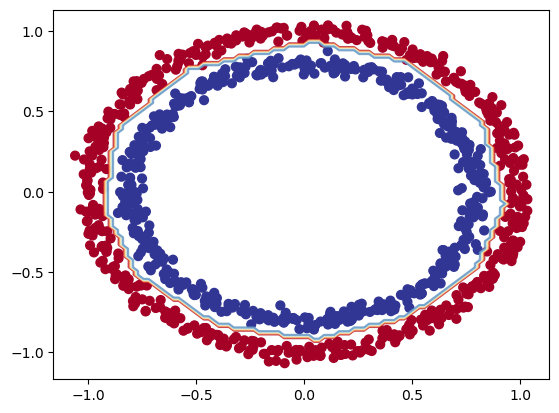

In [47]:
plot_decision(model, X,y)

313/313 [==============================] - 1s 2ms/step
bianry classification


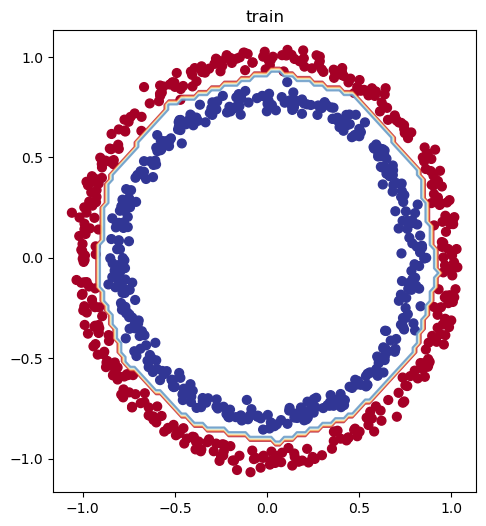

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision(model, X_train, y_train)



  1/313 [..............................] - ETA: 9s

313/313 [==============================] - 1s 2ms/step
bianry classification


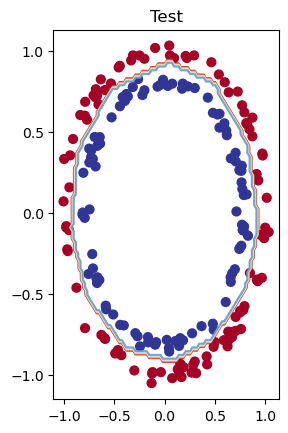

In [49]:
plt.subplot(1,2,1)
plt.title("Test")
plot_decision(model, X_test, y_test)

**loss accuracy curve**

<AxesSubplot: >

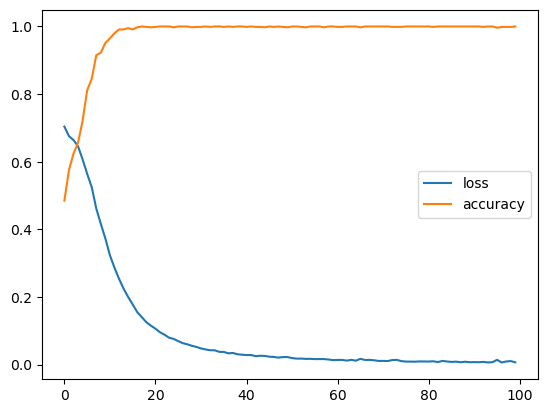

In [50]:
pd.DataFrame(history.history).plot()

## finding the ideal lr ##

In [63]:
model2= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
#lrearning rate callback
lr_schduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 ** (epoch/20) )

history2 = model2.fit(Xt_tensor, y_train , epochs= 100, callbacks=[lr_schduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 997us/step - loss: 0.6908 - accuracy: 0.5150 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5175 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5150 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5275 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5275 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5312 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5337 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 952us/step - l

<AxesSubplot: xlabel='epoch'>

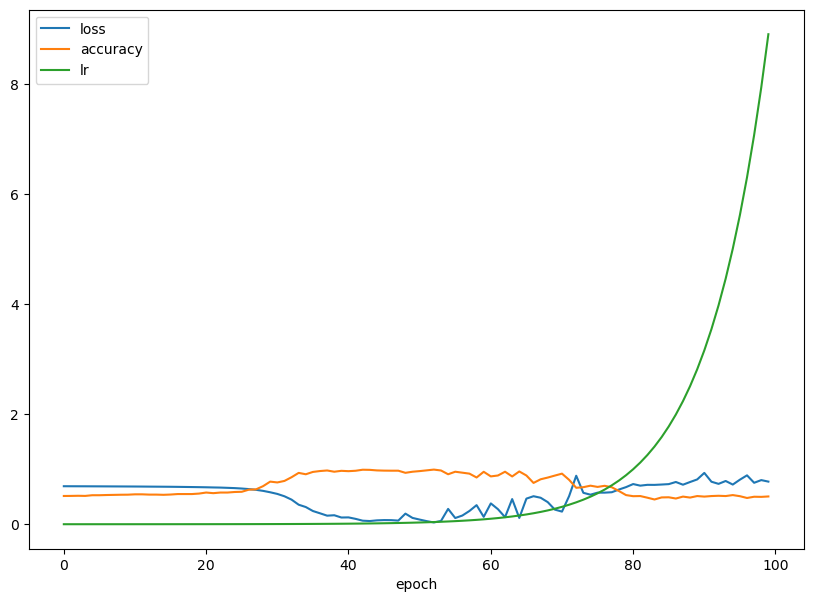

In [64]:
pd.DataFrame(history2.history).plot(figsize=(10,7),xlabel = 'epoch')

Text(0, 0.5, 'loss')

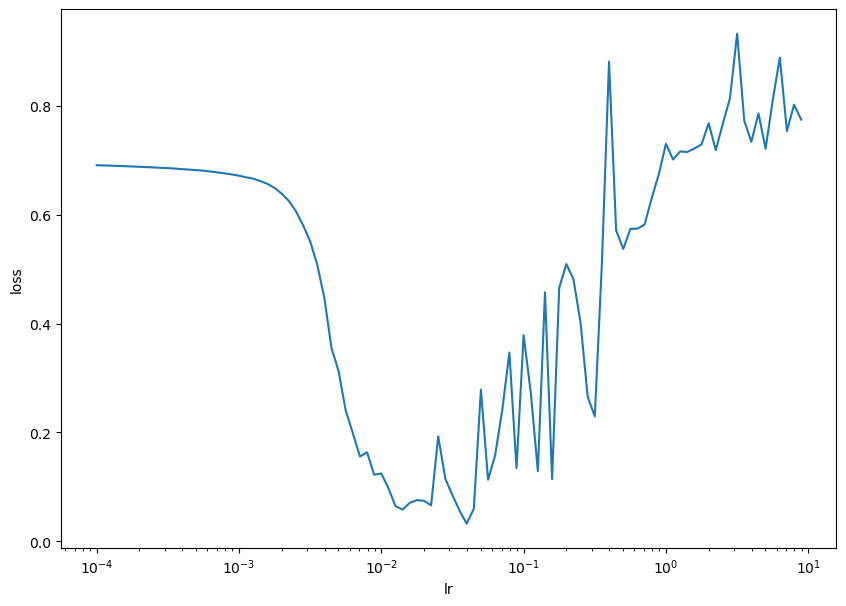

In [73]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs , history2.history['loss'])
plt.xlabel("lr")
plt.ylabel("loss")


In [86]:
tf.random.set_seed(32)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss= 'binary_crossentropy', 
               optimizer=tf.optimizers.Adam(learning_rate=0.01), 
               metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs= 20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5138
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5038
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5138
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5225
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5362
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5663
Epoch 7/20
25/25 [==============================] - 0s 938us/step - loss: 0.6669 - accuracy: 0.5975
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5813
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.6137
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6162
Epoch 11/20
25/25

<AxesSubplot: >

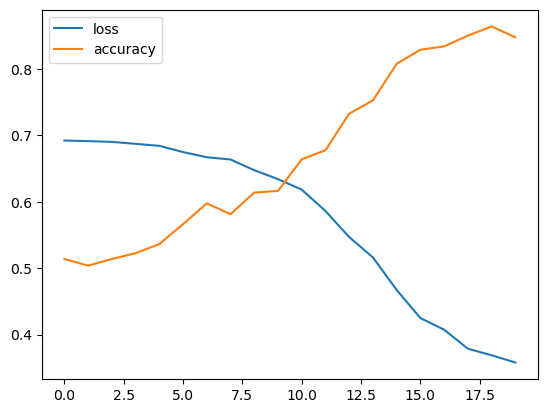

In [87]:
pd.DataFrame(history3.history).plot()

313/313 [==============================] - 0s 680us/step
bianry classification


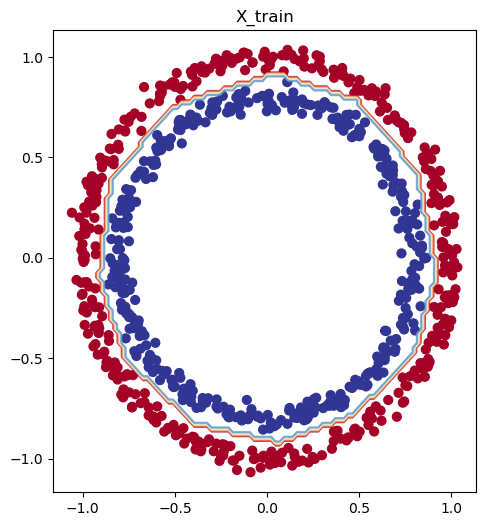

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("X_train")
plot_decision(model3, X_train, y_train)

313/313 [==============================] - 0s 740us/step
bianry classification


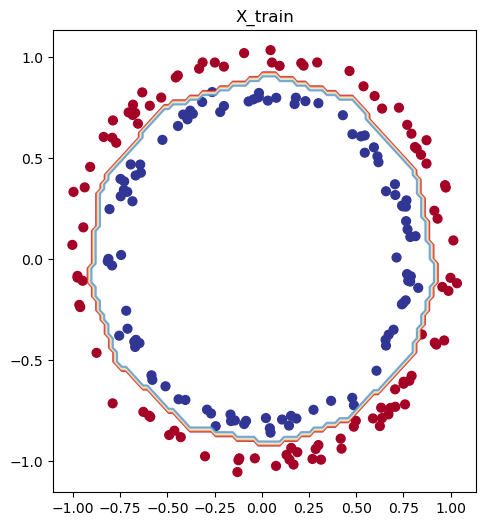

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("X_train")
plot_decision(model3, X_test, y_test)